In [1]:
import sys, os

from pathlib import Path
from omnibelt import load_csv, load_yaml
from PIL import Image


from scipy.stats import pearsonr
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm

from html.parser import HTMLParser

from scipy.stats import pearsonr
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta
from omnilearn import util
import omnibelt as belt
from tabulate import tabulate
import networkx as nx
import yfinance as yf

In [2]:
def get_closes(tickers, start, end, ratios=True):
    data = []
    for tick in tickers:
        a_df = yf.download(tick, 
                          start=start, 
                          end=end, 
                          progress=False)
        data.append(a_df['Close'].to_numpy())
        
    try:
        data = np.stack(data)
    except Exception as e:
        print(e)
        
    return data

In [3]:
path = Path('config/tickers/indices.yaml')
raw_info = load_yaml(path)
len(raw_info)

47

In [4]:
ystart, yend = 2010, 2021

In [5]:
for entry in raw_info:
    ticker, city, land, name = entry['ticker'], entry['city'], entry['country'], entry['clean']
    raw = get_closes([ticker], start=f'{ystart}-01-01', end=f'{yend}-12-31', )
    print(f'{name} ({city}, {land}) - {raw.shape}')

S&P500 (New York, United States) - (1, 2928)
Dow30 (New York, United States) - (1, 2928)
Nasdaq (New York, United States) - (1, 2928)
NYSE (New York, United States) - (1, 2928)
NYSE AMEX (New York, United States) - (1, 2928)
UK100 (London, United Kingdom) - (1, 2704)
R2000 (Chicago, United States) - (1, 2928)
VolatilityIndex (Chicago, United States) - (1, 2927)
FTSE100 (London, United Kingdom) - (1, 2931)
DAX (Frankfurt, Germany) - (1, 2945)
CAC40 (Paris, France) - (1, 2971)
EURO50 (Frankfurt, Eurozone) - (1, 2911)
EURONEXT100 (, Eurozone) - (1, 2971)
BEL20 (Brussels, Belgium) - (1, 2970)
MOEX (Moscow, Russia) - (1, 2085)
NIK225 (Tokyo, Japan) - (1, 2845)
HS50 (Hong Kong, Hong Kong) - (1, 2860)
SSE (Shanghai, China) - (1, 2823)
SZE (Shenzhen, China) - (1, 2823)
STI (Singapore, Singapore) - (1, 2898)
ASX200 (Sydney, Australia) - (1, 2933)
XAO500 (Sydney, Australia) - (1, 2937)
BSE30 (Mumbai, India) - (1, 2855)
IDX (Jakarta, Indonesia) - (1, 2832)
KLSE (Kuala Lumpur, Malaysia) - (1, 2849

In [6]:

a_df = yf.download(raw_info[0]['ticker'], start=f'{ystart}-01-01', end=f'{yend}-12-31', 
                  progress=False)
a_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,1126.599976,1127.640015,1114.810059,1115.099976,1115.099976,2076990000
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000


In [11]:
d = a_df.index.to_list()[0]

In [ ]:
str(d).split(' ')[0]

In [7]:
a_df['Date']

KeyError: 'Date'

In [9]:
raw = '''^GSPC	S&P 500	4,444.65	-35.06	-0.78%	733.170M			
^DJI	Dow 30	35,325.87	-299.53	-0.84%	125.572M			
^IXIC	Nasdaq	14,630.12	-163.64	-1.11%	1.707B			
^NYA	NYSE COMPOSITE (DJ)	16,717.86	-118.89	-0.71%	0			
^XAX	NYSE AMEX COMPOSITE INDEX	2,959.73	-12.93	-0.43%	0			
^BUK100P	Cboe UK 100	714.39	+2.36	+0.33%	0			
^RUT	Russell 2000	2,169.58	-33.84	-1.54%	0			
^VIX	CBOE Volatility Index	17.30	+1.18	+7.32%	0			
^FTSE	FTSE 100	7,181.11	+27.13	+0.38%	0			
^GDAXI	DAX PERFORMANCE-INDEX	15,914.99	-10.74	-0.07%	0			
^FCHI	CAC 40	6,821.84	-16.93	-0.25%	0			
^STOXX50E	ESTX 50 PR.EUR	4,197.39	-5.05	-0.12%	0			
^N100	EURONEXT 100	1,314.72	-1.68	-0.13%	0			
^BFX	BEL 20	4,320.26	-18.09	-0.42%	0			
IMOEX.ME	MOEX Russia Index	3,941.61	+46.30	+1.19%	0			
^N225	Nikkei 225	27,424.47	-98.72	-0.36%	0			
^HSI	HANG SENG INDEX	25,745.87	-435.59	-1.66%	0			
000001.SS	SSE Composite Index	3,446.98	-70.37	-2.00%	3.634B			
399001.SZ	Shenzhen Component	14,350.65	-343.09	-2.33%	432.275M			
^STI	STI Index	3,118.51	-27.01	-0.86%	0			
^AXJO	S&P/ASX 200	7,511.00	-71.50	-0.94%	0			
^AORD	ALL ORDINARIES	7,773.30	-76.30	-0.97%	0			
^BSESN	S&P BSE SENSEX	55,792.27	+209.69	+0.38%	0			
^JKSE	Jakarta Composite Index	6,087.91	-51.58	-0.84%	0			
^KLSE	FTSE Bursa Malaysia KLCI	1,523.59	+20.69	+1.38%	0			
^NZ50	S&P/NZX 50 INDEX GROSS	12,635.32	-84.88	-0.67%	0			
^KS11	KOSPI Composite Index	3,143.09	-28.20	-0.89%	690,842			
^TWII	TSEC weighted index	16,661.36	-197.41	-1.17%	0			
^GSPTSE	S&P/TSX Composite index	20,378.47	-104.95	-0.51%	59.843M			
^BVSP	IBOVESPA	118,053.36	-1,126.67	-0.95%	0			
^MXX	IPC MEXICO	51,453.96	+69.05	+0.13%	33.569M			
^IPSA	S&P/CLX IPSA	5,058.88	0.00	0.00%	0			
^MERV	MERVAL	38,390.84	+233.89	+0.61%	0			
^TA125.TA	TA-125	1,754.01	-4.40	-0.25%	0			
^CASE30	EGX 30 Price Return Index	10,937.70	-108.40	-0.98%	91.803M			
^JN0U.JO	Top 40 USD Net TRI Index	4,510.38	-44.52	-0.98%	0			'''

In [10]:
path = 'config/tickers/indices.yaml'

In [19]:
tab = [row.split('\t')[:2] for row in raw.split('\n')]
print(tabulate(tab))
tab = [{'ticker': t, 'name': n, 'city': '', 'country': '', 'clean': ''} for t,n in tab]
import yaml
# yaml.dump(tab, open(path, 'w'))

---------  -------------------------
^GSPC      S&P 500
^DJI       Dow 30
^IXIC      Nasdaq
^NYA       NYSE COMPOSITE (DJ)
^XAX       NYSE AMEX COMPOSITE INDEX
^BUK100P   Cboe UK 100
^RUT       Russell 2000
^VIX       CBOE Volatility Index
^FTSE      FTSE 100
^GDAXI     DAX PERFORMANCE-INDEX
^FCHI      CAC 40
^STOXX50E  ESTX 50 PR.EUR
^N100      EURONEXT 100
^BFX       BEL 20
IMOEX.ME   MOEX Russia Index
^N225      Nikkei 225
^HSI       HANG SENG INDEX
000001.SS  SSE Composite Index
399001.SZ  Shenzhen Component
^STI       STI Index
^AXJO      S&P/ASX 200
^AORD      ALL ORDINARIES
^BSESN     S&P BSE SENSEX
^JKSE      Jakarta Composite Index
^KLSE      FTSE Bursa Malaysia KLCI
^NZ50      S&P/NZX 50 INDEX GROSS
^KS11      KOSPI Composite Index
^TWII      TSEC weighted index
^GSPTSE    S&P/TSX Composite index
^BVSP      IBOVESPA
^MXX       IPC MEXICO
^IPSA      S&P/CLX IPSA
^MERV      MERVAL
^TA125.TA  TA-125
^CASE30    EGX 30 Price Return Index
^JN0U.JO   Top 40 USD Net TRI Index
-------

In [5]:
df_list = pd.read_html('https://finance.yahoo.com/world-indices/')
majorStockIdx = df_list[0]
majorStockIdx.head()

ValueError: No tables found

In [ ]:

region_idx= 
{ 'US & Canada' : ['^GSPC', '^DJI', '^IXIC', '^RUT','^GSPTSE'],
  'Latin America' : ['^BVSP', '^MXX', '^IPSA'],
  'East Asia' : ['^N225', '^HSI', '000001.SS', '399001.SZ', '^TWII', '^KS11'],
  'ASEAN & Oceania' : ['^STI', '^JKSE', '^KLSE','^AXJO',  '^NZ50'],
  'South & West Asia' : ['^BSESN', '^TA125.TA'],
  'Europe' : ['^FTSE', '^GDAXI', '^FCHI', '^STOXX50E','^N100', '^BFX']
}

In [268]:


def show_graph(wts, labels, figsize=(8,8), norm=False, **kwargs):

    if norm:
        wts /= np.sqrt((wts**2).sum(-1,keepdims=True))
    
    G = nx.from_numpy_matrix(wts, create_using=nx.MultiDiGraph)

    colors = 'C2'
    # colors = ['C2' if i in sel else 'C3' for i in range(len(G))]

    edges,weights = zip(*sorted(nx.get_edge_attributes(G,'weight').items(), key=lambda x: x[-1], reverse=False))

    if 'pos' not in kwargs:
    
        try:
            pos = nx.planar_layout(G)
        except:
        #     pos = nx.spring_layout(G)
            pos = nx.circular_layout(G)
        
        kwargs['pos'] = pos
    kwargs.update(dict(node_color=colors, labels={i:n for i,n in enumerate(labels)},#, with_labels=True,
                  edgelist=edges, edge_color=weights, node_size=200,
                  edge_cmap=plt.get_cmap('viridis'), vmin=0))
    plt.figure(figsize=figsize)
    nx.draw(G, **kwargs)

def show_mat(mat, lbls=None):
    if lbls is None:
        lbls = names
    row_labels = lbls
    # util.plot_mat(cg, val_fmt=1, figside=0.2);
    util.plot_mat(mat, figside=0.2);
    plt.xticks(range(len(tickers)), row_labels, rotation=90)
    plt.yticks(range(len(tickers)), row_labels)
    plt.tight_layout();

In [3]:
year = 2020
year = 2021

startyear, endyear = year, year

startyear, endyear = 2014, 2021

In [4]:
# tickers = ['MSFT', 'AAPL', 'PZZA', 'T', 'FB', 'HD', 'CLX', 'CNQ', 
#                    'WFC', 'JNJ', 'EMR', 'INTC', 'V', 'SHW', 'PSA', 'ED', 
#                    'BA', 'COST']
# tickers = ['FB', 'HD', 'CLX', 'CNQ', 'WFC', 'JNJ', 'EMR', 'INTC', 'V', 'SHW', 'PSA', 'ED', ]
# tickers = ['FB', 'HD', 'CLX', 'CNQ', 'WFC', 'JNJ', 'EMR', 'INTC', 'SHW', 'PSA', ]#'ED', ]
# sectors = ['Comm', 'Disc', 'Stap', 'Ener', 'Fin', 'Heal', 'Ind', 'IT', 'Mat', 'RE', ]#'Util']
# tickers = ['XLE', 'XLF', 'XLU', 'XLI', 'XLK', 'XLV', 'XLY', 'XLP', 'XLB', 'XLRE']
# sectors = ['Ener', 'Fin', 'Util', 'Ind', 'Tech', 'Heal', 'Disc', 'Stap', 'Mat', 'RE', ]

In [5]:
# full = get_closes(tickers, start=f'{year}-01-01', end=f'{year}-12-31', )
# rats = full / full[:,:1]
# full.shape

In [6]:
# plt.figure(figsize=(9,7))
# for n, l in zip(sectors, rats):
#     plt.plot(l,label=n)
# plt.legend();
# plt.tight_layout();

In [7]:
# C = np.cov(rats)
# C.shape

In [8]:
# util.plot_mat(C, val_fmt=2);
# plt.xticks(range(len(tickers)), sectors)
# plt.yticks(range(len(tickers)), sectors)
# plt.tight_layout();

In [9]:
# show_graph(C**3.5, sectors)

In [10]:
info = belt.load_yaml('config/tickers/countries.yaml')
del info['Egypt']
names = list(info)
tickers = [info[t] for t in names]

In [11]:
path = Path(r'C:\Users\anwan\Downloads\world_country_and_usa_states_latitude_and_longitude_values.csv')

In [12]:
raw = load_csv(path)
countries = [row[:4] for row in raw]
lands = np.array(countries)

In [13]:
data = [{'code':c, 'lat': float(lat), 'lon': float(lon), 'name': name} 
        for c, lat, lon, name in lands[1:] if len(lat) and len(lon)]
land_locs = {c['name']:c for c in data}
data[0]

{'code': 'AD', 'lat': 42.546245, 'lon': 1.601554, 'name': 'Andorra'}

In [14]:
content = [land_locs[l] for l in names]
lats, lons = np.array([c['lat'] for c in content]), np.array([c['lon'] for c in content])
lons = lons
lats = lats
content[0]

{'code': 'JP', 'lat': 36.204824, 'lon': 138.252924, 'name': 'Japan'}

In [15]:
# plt.figure(figsize=(9,7))

# plt.scatter(lons, lats, s=50, c='y')
# for la, lo, n in zip(lats, lons, names):
#     plt.text(lo, la, n, ha='center', va='center')

In [16]:
def sliding_windows(data, window, step):
    idx = 0
    while idx*step + window < len(data):
        yield data[idx*step : idx*step + window]
        idx += 1

In [271]:
_data = get_closes(['GB100'], start=f'2021-01-01', end=f'2021-12-31', )
_data.shape


1 Failed download:
- GB100: No data found, symbol may be delisted


(1, 0)

In [17]:
cticks_raw = get_closes(tickers, start=f'{startyear}-01-01', end=f'{endyear}-12-31', )

In [18]:
raw = cticks_raw / cticks_raw[:,:1]

raw.shape

(37, 1920)

In [19]:
gs = []
perf = []
ders = []
window = 50
step = 20

for win in tqdm(sliding_windows(raw.T, window=window, step=step), total=(cticks_raw.shape[1] - window + 1)//step):
    
    perf.append(win.mean(0))
    
    win = win.copy()
#     win /= win[:1]
    
    pts = win.T.copy()
    
    win /= win[:1]
    der = win[1:] - win[:-1]
    
    pts = pts / pts.std(-1,keepdims=True)
#     pts = pts / pts[:,:1]
    
    cg = np.cov(pts)
    gs.append(cg)
    
    ders.append(der.mean(0))

perf = np.stack(perf)
# perf /= perf[:1,:]

ders = np.stack(ders)
gs = np.stack(gs)
gs.shape, perf.shape

  0%|          | 0/93 [00:00<?, ?it/s]

((94, 37, 37), (94, 37))

In [20]:
# vid = util.Video(gs.reshape(*gs.shape, 1))
# vid.play('jupyter', scale=8)

In [21]:
q1, q2 = 'United States', 'Poland'

q1, q2 = 'Japan', 'Germany'

q1, q2 = 'France', 'United Kingdom'

# q1, q2 = 'Sweden', 'Russia'

<IPython.core.display.Javascript object>


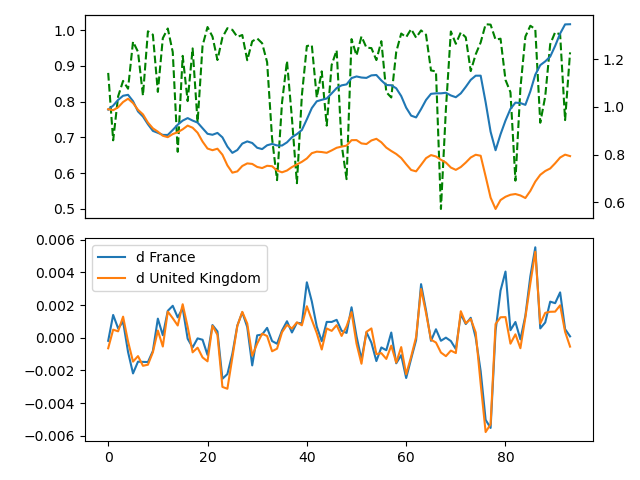

In [22]:

i1, i2 = names.index(q1), names.index(q2)
cor = gs[:, i1, i2]

# fg, ax = plt.subplots()

fg, (ax, ax2) = plt.subplots(2)
axt = ax.twinx()

plt.sca(axt)
plt.plot(perf[:, i1], label=q1)
plt.plot(perf[:, i2], label=q2)
plt.xticks([])

plt.sca(ax)
plt.plot(cor, ls='--', c='g', label='Corellation')
plt.xticks([])

plt.sca(ax2)
plt.plot(ders[:,i1], label=f'd {q1}')
plt.plot(ders[:,i2], label=f'd {q2}')
plt.legend()
plt.tight_layout();

<IPython.core.display.Javascript object>


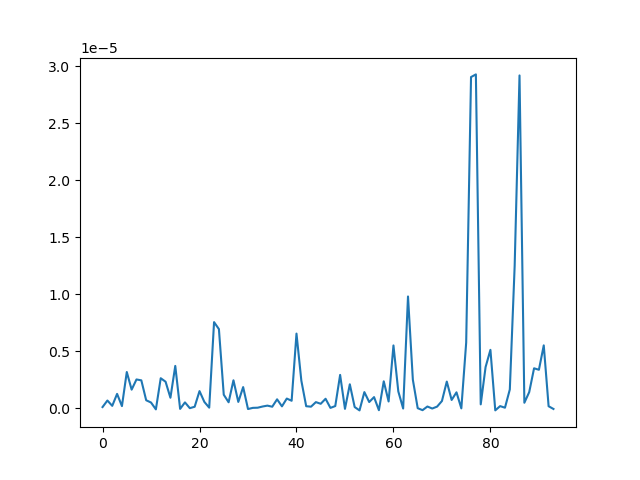

In [23]:
plt.figure()
plt.plot(ders[:,i1]*ders[:,i2])

In [24]:
ders.shape

(94, 37)

In [25]:
nders = ders / np.sqrt((ders**2).sum(0,keepdims=True))
nders.shape

(94, 37)

In [26]:
L, N = ders.shape

# cders = ders.reshape(L, N, 1) * ders.reshape(L, 1, N)
# cders = np.sqrt(cders)
cders = nders.reshape(L, N, 1) * nders.reshape(L, 1, N)
cders.shape

(94, 37, 37)

<IPython.core.display.Javascript object>


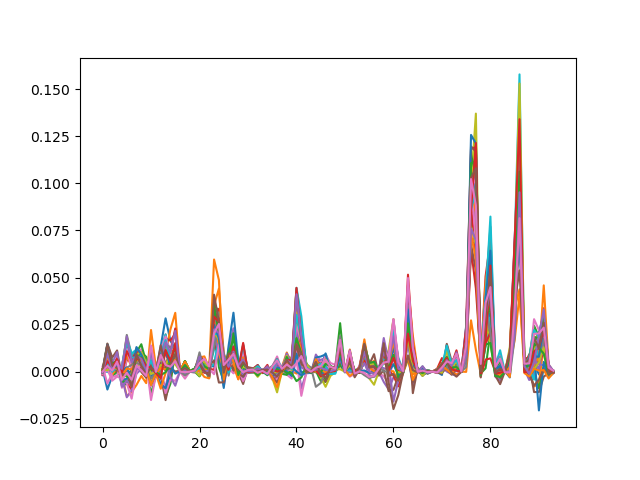

In [27]:
sims = cders.sum(0)
plt.figure()

plt.plot(cders[:,i1]);

<IPython.core.display.Javascript object>


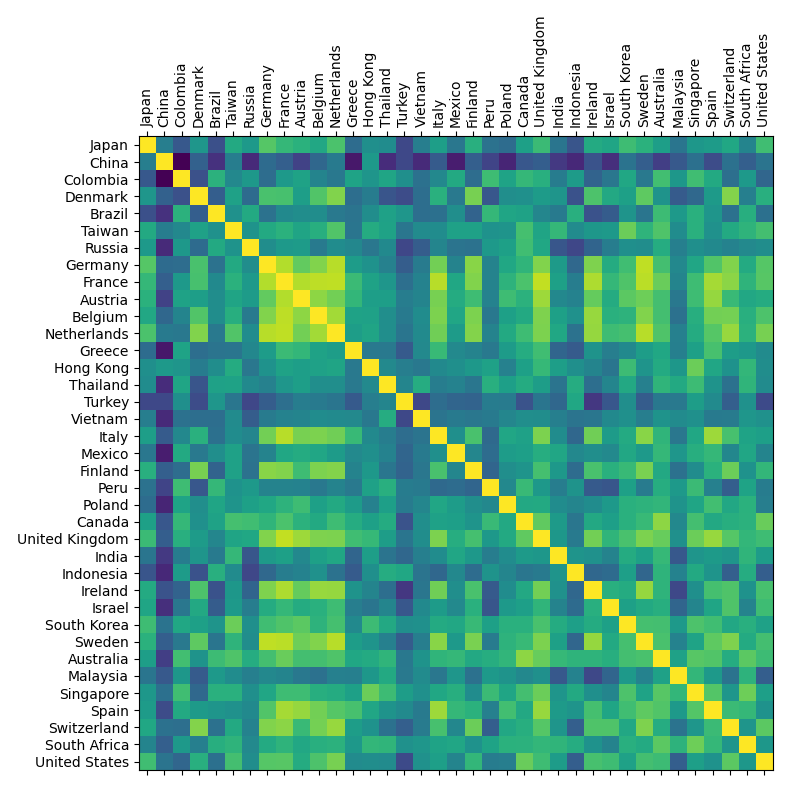

In [216]:
total_sim = cders.sum(0)
show_mat(total_sim)

In [35]:
# show_graph(total_sim**10 - np.eye(len(total_sim)), names, norm=True, pos=np.stack([lons, lats],1), figsize=(9,7))

In [262]:
vals, vecs = np.linalg.eig(total_sim)
vals.shape, vecs.shape

((37,), (37, 37))

<IPython.core.display.Javascript object>


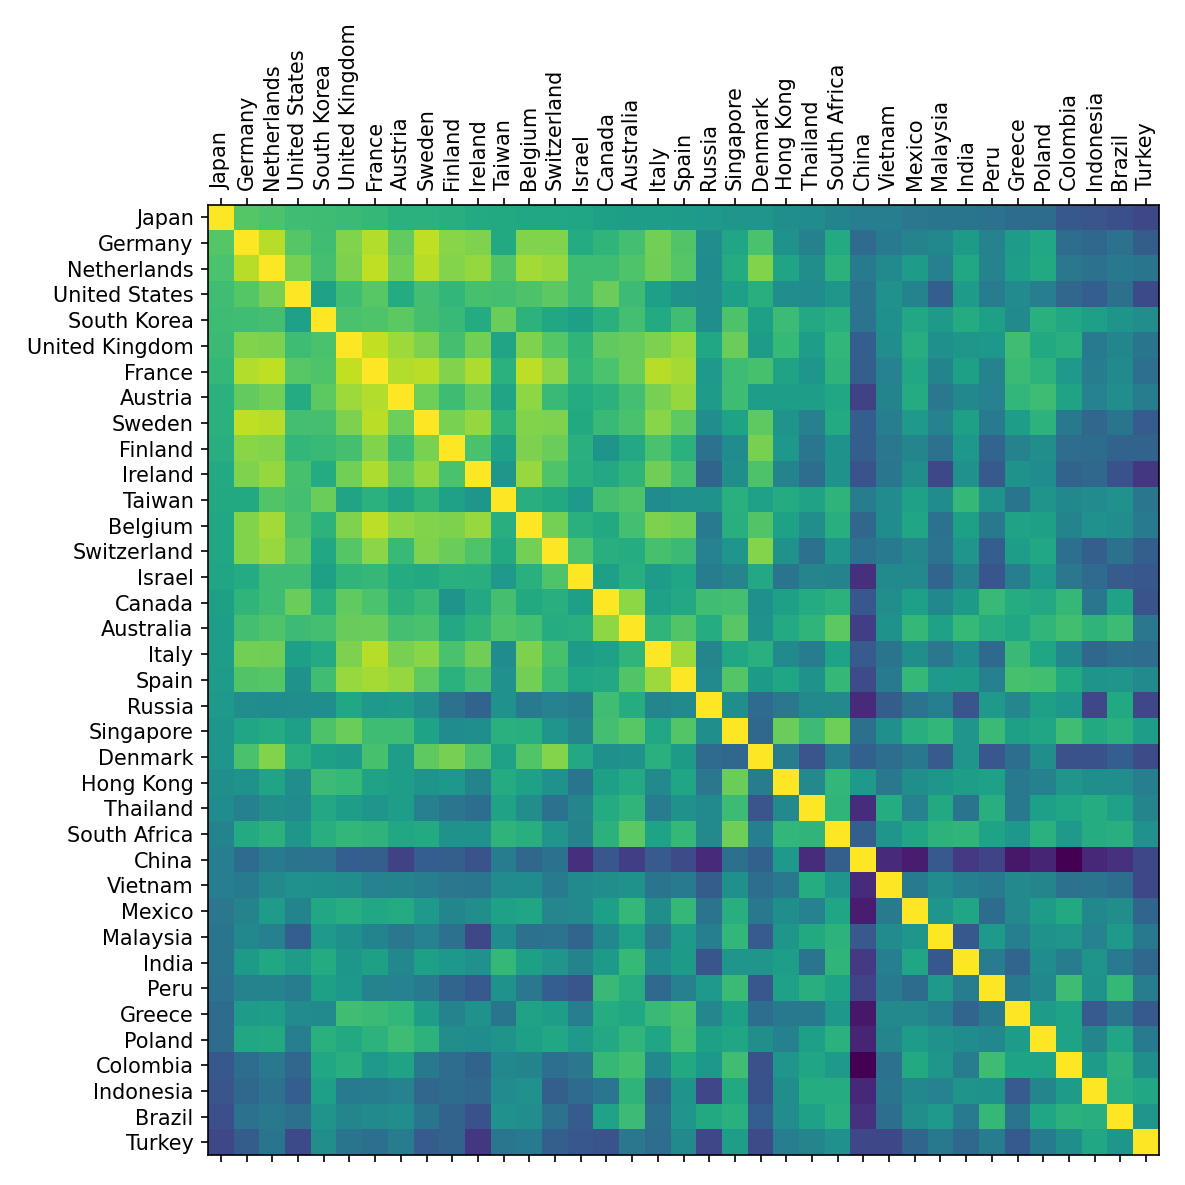

In [270]:
scores = vecs @ np.diag(vals) @ total_sim
order = scores.sum(0).argsort()[::-1]
osim = total_sim[order][:,order]
show_mat(osim, np.array(names)[order])

In [31]:
import ipycytoscape
import ipywidgets as widgets
from IPython.display import display
import networkx as nx
from sklearn.cluster import SpectralClustering

In [32]:
total_sim.shape

(37, 37)

In [33]:
g_wts = total_sim**10 - np.eye(len(total_sim))
g_wts /= np.sqrt((g_wts**2).sum(-1,keepdims=True))

W = g_wts

W = np.tril(W)*(1-np.eye(len(W)))

G = nx.from_numpy_matrix(W, create_using=nx.MultiDiGraph)

In [41]:
# show_mat(W)

In [34]:
# # G = nx.complete_graph(5)
# viz = ipycytoscape.CytoscapeWidget()
# viz.graph.add_graph_from_networkx(G)
# display(viz)

In [223]:
style = [
        {
            'selector': 'edge',
            'style': {
#                 'label': 'data(wt)',
                 'curve-style': 'bezier',
#                 'line-thickness': 'data(weight)',
#                 'width': 'mapData(weight, 0, 1, 1, 8)',
                'line-color': '#0000ff',
                'opacity':'mapData(weight, 0, 1, 0, 1)',
#                 'line-color': 'mapData(weight, 0, 1, #ffffff, #0000ff)',
#                 'line-color': 'data(weight)',
#                 'label-position': {'x':0, 'y': 0},
            }
        },
    {
        'selector': 'node',
        'style': {
            'label': 'data(name)',
            'position': {'x':'data(lat)', 'y':'data(lon)'},
            'background-color': 'data(color)',
        }
    }
#         {
#             'selector': '[weight <= 3]',
#             'style': {
#                 'line-color': 'blue'
#             }
#         }
    ]

In [224]:
# W = np.random.rand(5,5)
# W = W @ W.T
# G = nx.from_numpy_matrix(np.tril(W)*(1-np.eye(5)), create_using=nx.Graph)

In [248]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

ncls = len(colors)
ncls = 5

clustering = SpectralClustering(n_clusters=ncls, affinity='precomputed').fit(total_sim)
y_pred = clustering.labels_
# y_pred

In [249]:
for edge in G.edges:
    G.edges[edge]['wt'] = '{:.2f}'.format(G.edges[edge]['weight'])
# edge
for node, name, la, lo, c in zip(G.nodes, names, lats, lons, y_pred):
    G.nodes[node].update({'name': name, 'lat': la, 'lon': lo, 'color': colors[c % len(colors)]})
# G.nodes[0]

In [250]:
def _get_pos(i):
    node = G.nodes[i]
    return [node['lat'], node['lon']]

scale = 8
pos = {i:{'x':G.nodes[i]['lon']*scale, 'y':-G.nodes[i]['lat']*scale} for i in range(len(G))}

In [251]:
layout = {'name': 'cola'}
layout = {'name': 'preset', 'positions': pos }

In [252]:
viz = ipycytoscape.CytoscapeWidget()
viz.graph.add_graph_from_networkx(G)
# ipycytoscape_obj9.graph.add_graph_from_json(railnetJSON, directed=True)
viz.set_style(style)
viz.set_layout(**layout)
display(viz)

CytoscapeWidget(cytoscape_layout={'name': 'preset', 'positions': {0: {'x': 1106.023392, 'y': -289.638592}, 1: …

In [124]:
edges = np.tril(total_sim)*(1-np.eye(len(names)))
edges.shape

(37, 37)

In [125]:
inds = list(np.ndindex(*edges.shape))

[(0, 0), (0, 1), (0, 2), (0, 3)]

In [137]:
inds = np.triu_indices(len(edges),1)
vals = total_sim[inds]
inds = np.stack(inds,-1)

In [138]:
len(vals), inds.shape

(666, (666, 2))

In [147]:
order = vals.argsort()[::-1]
oind = inds[order]
oind[:5]

array([[ 8, 23],
       [ 7, 29],
       [ 8, 11],
       [ 8, 10],
       [ 8, 29]])

In [151]:
ordered = [[names[x], names[y]] for x,y in oind]
ordered[:5]

[['France', 'United Kingdom'],
 ['Germany', 'Sweden'],
 ['France', 'Netherlands'],
 ['France', 'Belgium'],
 ['France', 'Sweden']]

In [257]:
mask = np.zeros(total_sim.shape).astype(bool)
mask[tuple(oind[: int(len(oind)* 0.1 ) ].T)] = 1

In [258]:
best = total_sim**5 - np.eye(len(total_sim))
best /= np.sqrt((best**2).sum(-1,keepdims=True))
best = np.triu(best)

best = mask

oG = nx.from_numpy_matrix(best*(1-np.eye(len(W))), create_using=nx.MultiDiGraph)

In [259]:
for edge in oG.edges:
    oG.edges[edge]['wt'] = '{:.2f}'.format(oG.edges[edge]['weight'])
# edge
for node, name, la, lo in zip(oG.nodes, names, lats, lons):
    oG.nodes[node].update({'name': name, 'lat': la, 'lon': lo})
# G.nodes[0]

In [260]:
viz = ipycytoscape.CytoscapeWidget()
viz.graph.add_graph_from_networkx(oG)
# ipycytoscape_obj9.graph.add_graph_from_json(railnetJSON, directed=True)
viz.set_style(style)
viz.set_layout(**layout)
display(viz)

CytoscapeWidget(cytoscape_layout={'name': 'preset', 'positions': {0: {'x': 1106.023392, 'y': -289.638592}, 1: …

In [197]:
# Q = total_sim.copy()*(1-np.eye(len(W)))
# Q.shape

(37, 37)

In [200]:
# L = np.diag(Q.sum(0)) - Q

In [204]:
# vals, vecs = np.linalg.eig(L)

In [205]:
# vals

array([ 0.        , 15.78201022, 18.84207092, 20.61470482, 20.77140845,
       21.04554346, 27.8404108 , 21.42246688, 21.66781031, 21.93300662,
       27.39163077, 27.24578296, 22.21996496, 22.43171887, 22.6002564 ,
       22.79116016, 22.92681849, 23.10074251, 23.18323166, 23.49569889,
       27.0235862 , 23.72152454, 24.01347897, 26.72853274, 26.579188  ,
       26.5342904 , 26.38182037, 26.26305274, 26.02232816, 25.83518638,
       24.57939057, 24.70884339, 24.87079384, 25.03779786, 25.62542324,
       25.24606037, 25.36395406])

In [ ]:

# def paint_blue(event):
#     auxNode = cyGraph.graph.nodes[int(event['data']['id'])]
#     auxNode.classes += ' blue'
# cyGraph.on('node', 'click', paint_blue)

In [36]:
import json

In [37]:
railnet= '''{
    "nodes": [
        {"data": { "id": "BER", "label":"HBf BER", "classes":"east"}},
        {"data": { "id": "MUN", "label":"HBf MUN", "classes":"west"}},
        {"data": { "id": "FRA", "label":"HBf FRA", "classes":"west"}},
        {"data": { "id": "HAM", "label":"HBf HAM", "classes":"west"}},
        {"data": { "id": "LEP", "label":"HBf LEP", "classes":"east"}}
        ],
    "edges": [
        {"data": { "id": "line1", "source": "BER", "target": "MUN","label":"200km/h"}},
        {"data": { "id": "line2", "source": "MUN", "target": "FRA","label":"200km/h"}},
        {"data": { "id": "line3", "source": "FRA", "target": "BER","label":"250km/h" }},
        {"data": { "id": "line4", "source": "BER", "target": "HAM","label":"300km/h" }},
        {"data": { "id": "line5", "source": "BER", "target": "LEP","label":"300km/h" }}
        
    ]
  }'''

my_style = [
    {'selector': 'node','style': {
        'font-family': 'arial',
        'font-size': '10px',
        'label': 'data(label)',}},
    
    {'selector': 'node[classes="east"]','style': {
        'background-color': 'yellow'}},
    
     {'selector': 'node[classes="west"]','style': {
        'background-color': 'blue'}},
    
    
    {'selector': 'node[id = "BER"]','style': {
        'font-family': 'arial',
        'font-size': '10px',
        'label': 'data(label)',
        'background-color': 'green'}},
    
    {'selector': 'edge[id = "line1"]','style': {
        'font-family': 'arial',
        'font-size': '10px',
        'label': 'data(label)'}},
    
    {'selector': 'edge[id = "line2"]','style': {
        'font-family': 'arial',
        'font-size': '10px',
        'label': 'data(label)'}},
    
    {'selector': 'edge[id = "line3"]','style': {
        'font-family': 'arial',
        'font-size': '10px',
        'label': 'data(label)'}},
    
    {'selector': 'edge[id = "line4"]','style': {
        'font-family': 'arial',
        'font-size': '10px',
        'label': 'data(label)'}},
    
    {'selector': 'edge[id = "line5"]','style': {
        'font-family': 'arial',
        'font-size': '10px',
        'label': 'data(label)'}}
    
    ]
railnetJSON = json.loads(railnet)
ipycytoscape_obj9 = ipycytoscape.CytoscapeWidget()
ipycytoscape_obj9.graph.add_graph_from_json(railnetJSON, directed=True) # We're specifying that the graph should be undirected
ipycytoscape_obj9.set_style(my_style)
ipycytoscape_obj9

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'font-famil…

In [42]:

railnet= '''{
    "nodes": [
        {"data": { "id": "BER", "label":"HBf BER"}},
        {"data": { "id": "MUN", "label":"HBf MUN"}},
        {"data": { "id": "FRA", "label":"HBf FRA"}},
        {"data": { "id": "HAM", "label":"HBf HAM"}}
        ],
    "edges": [
        {"data": { "id": "line1", "source": "BER", "target": "MUN","label":"200km/h"}},
        {"data": { "id": "line2", "source": "MUN", "target": "FRA","label":"200km/h"}},
        {"data": { "id": "line3", "source": "FRA", "target": "BER","label":"250km/h" }},
        {"data": { "id": "line4", "source": "BER", "target": "HAM","label":"300km/h" }}
        
    ]
  }'''

my_style = [
    {'selector': 'node','style': {
        'font-family': 'arial',
        'font-size': '10px',
        'label': 'data(label)',
        'background-color': 'red'}},
    
    {'selector': 'node[id = "BER"]','style': {
        'font-family': 'arial',
        'font-size': '10px',
        'label': 'data(label)',
        'background-color': 'green'}},
    
    {'selector': 'edge[id = "line1"]','style': {
        'font-family': 'arial',
        'font-size': '10px',
        'label': 'data(label)',}},
    
    {'selector': 'edge[id = "line2"]','style': {
        'font-family': 'arial',
        'font-size': '10px',
        'label': 'data(label)',}},
    
    {'selector': 'edge[id = "line3"]','style': {
        'font-family': 'arial',
        'font-size': '10px',
        'label': 'data(label)',}},
    
    {'selector': 'edge[id = "line4"]','style': {
        'font-family': 'arial',
        'font-size': '10px',
        'label': 'data(label)',}}
    
    ]
# railnetJSON = json.loads(railnet)
# ipycytoscape_obj8 = ipycytoscape.CytoscapeWidget()
# ipycytoscape_obj8.graph.add_graph_from_json(railnetJSON, directed=True) # We're specifying that the graph should be undirected
# ipycytoscape_obj8.set_style(my_style)
# ipycytoscape_obj8.set_style(my_style)


cytoscapeobj = ipycytoscape.CytoscapeWidget()
cytoscapeobj.graph.add_graph_from_json(railnetJSON, directed=True)
cytoscapeobj.set_layout(name='dagre', nodeSpacing=10, edgeLengthVal=10)
cytoscapeobj.set_style([{
                        'selector': 'node',
                        'css': {
                            'background-color': '#11479e'
                            }
                        },
                        {
                        'selector': 'node:parent',
                        'css': {
                            'background-opacity': 0.333
                            }
                        },
                        {
                            'selector': 'edge',
                            'style': {
                                'width': 4,
                                'line-color': '#afbc3d',
                                'target-arrow-shape': 'triangle',
                                'target-arrow-color': '#afbc3d',
                                'curve-style': 'bezier'
                            }
                        }])

cytoscapeobj

CytoscapeWidget(cytoscape_layout={'name': 'dagre', 'nodeSpacing': 10, 'edgeLengthVal': 10}, cytoscape_style=[{…

In [ ]:
tbl = sorted(zip(names, g[names.index(q1), names.index(q2)]), key=lambda x: x[1], reverse=True)

In [12]:
cdat = cticks_raw / cticks_raw.std(-1,keepdims=True)
# cdat = cticks_raw / cticks_raw[:,:1]
pts = cdat.copy()
cg = np.cov(cdat)
cg.shape

(37, 37)

In [247]:
# row_labels = names
# # util.plot_mat(cg, val_fmt=1, figside=0.2);
# util.plot_mat(cg, figside=0.2);
# plt.xticks(range(len(tickers)), row_labels, rotation=90)
# plt.yticks(range(len(tickers)), row_labels)
# plt.tight_layout();

In [246]:
# show_graph(cg**20, names)
# show_graph(cg**20, names, pos=np.stack([lons, lats],1), figsize=(9,7))

In [20]:
query = 'Israel'

tbl = sorted(zip(names, cg[names.index(query)]), key=lambda x: x[1], reverse=True)
print(tabulate(tbl))

--------------  ----------
Israel           1.00052
Netherlands      0.895226
Switzerland      0.89055
Taiwan           0.873535
United States    0.848401
Denmark          0.842713
France           0.84092
India            0.827869
Finland          0.820379
Japan            0.809007
Ireland          0.803796
Sweden           0.78984
South Korea      0.761813
Canada           0.760124
Russia           0.689958
Hong Kong        0.671641
Germany          0.613003
Belgium          0.580428
Australia        0.528024
Austria          0.505308
China            0.48142
Italy            0.412444
Vietnam          0.283043
Thailand         0.254349
Brazil           0.230095
Peru             0.167564
Singapore        0.0639406
Poland          -0.0417112
United Kingdom  -0.057479
Greece          -0.0852793
Spain           -0.0959059
Indonesia       -0.137281
Mexico          -0.200107
South Africa    -0.207958
Colombia        -0.227521
Malaysia        -0.291333
Turkey          -0.463706
------------

In [15]:
wts = cg.copy()
wts.sort(1)
wts = wts[:,::-1]

<IPython.core.display.Javascript object>


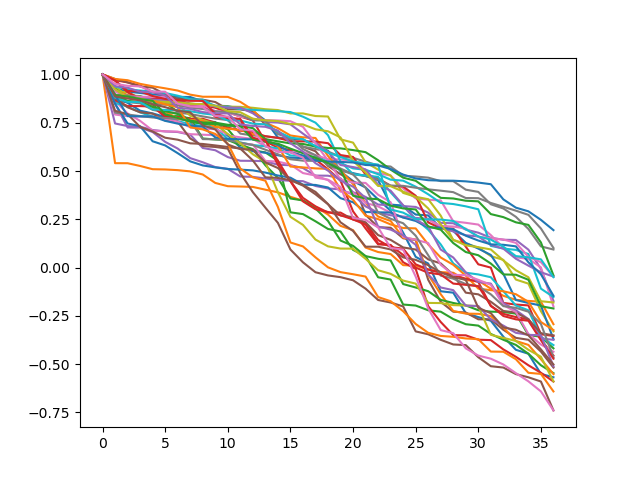

In [16]:
plt.figure()
plt.plot(wts.T);

<IPython.core.display.Javascript object>


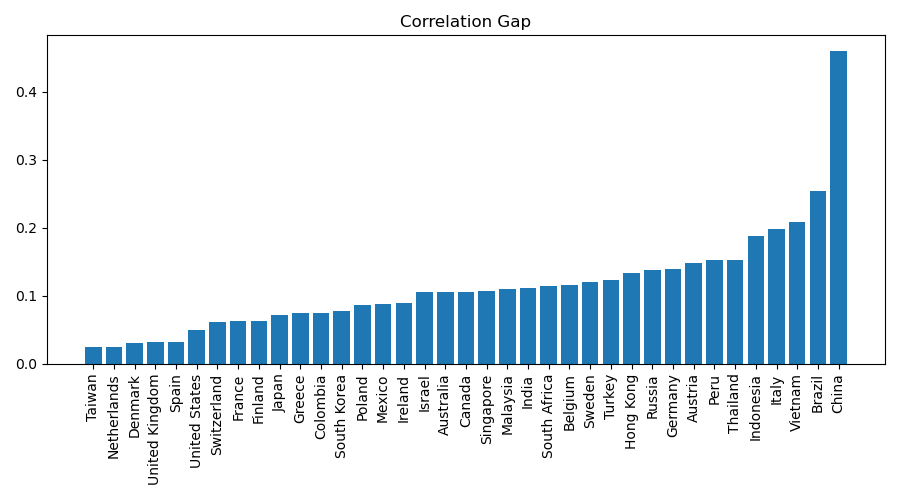

In [23]:
plt.figure(figsize=(9,5))
# gap = wts[:,0]-wts[:,1:4].mean(-1)
gap = wts[:,0]-wts[:,1]
order = gap.argsort()
plt.bar(np.arange(len(wts)), gap[order])
plt.xticks(range(len(tickers)), np.array(row_labels)[order], rotation=90);
plt.title('Correlation Gap')
plt.tight_layout();

In [163]:
import umap
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [160]:
pts.shape

(37, 252)

In [197]:
# reducer = umap.UMAP()

In [198]:
# embedding = reducer.fit_transform(pts)
# embedding.shape

In [199]:
# plt.figure()
# plt.scatter(*embedding.T)
# for xy, n in zip(embedding, names):
#     plt.text(*xy, n, ha='center', va='center')

In [192]:
import numpy as np

from sklearn.cluster import DBSCAN, MeanShift, OPTICS, SpectralClustering
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>


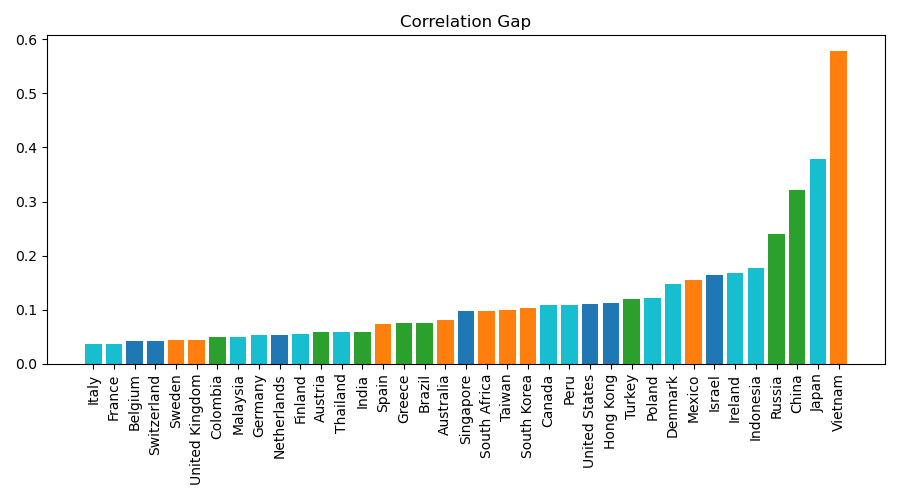

In [200]:
# db = DBSCAN(eps=20)
# db = MeanShift()
db = OPTICS()
# db = umap.UMAP()
# db = SpectralClustering(5)

db.fit(pts)
labels = db.labels_

plt.figure(figsize=(9,5))
# gap = wts[:,0]-wts[:,1]
# order = gap.argsort()
plt.bar(np.arange(len(wts)), gap[order], color=[f'C{i%10}' for i in labels[order]])
plt.xticks(range(len(tickers)), np.array(row_labels)[order], rotation=90);
plt.title('Correlation Gap')
plt.tight_layout();

In [177]:
# Python program to plot
# geographical data using plotly

# importing all necessary libraries
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

# some more libraries to plot graph
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

# To establish connection
init_notebook_mode(connected = True)


# type defined is choropleth to
# plot geographical plots
data = dict(type = 'choropleth',

			# location: Arizoana, California, Newyork
			locations = ['AZ', 'CA', 'NY'],
			
			# States of USA
			locationmode = 'USA-states',
			
			# colorscale can be added as per requirement
			colorscale = 'Portland',
			
			# text can be given anything you like
			text = ['text 1', 'text 2', 'text 3'],
			z = [1.0, 2.0, 3.0],
			colorbar = {'title': 'Colorbar Title Goes Here'})
			
layout = dict(geo ={'scope': 'usa'})

# passing data dictionary as a list
choromap = go.Figure(data = [data], layout = layout)

# plotting graph
iplot(choromap)


ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [178]:
pip install geograpy

Note: you may need to restart the kernel to use updated packages.  Downloading nltk-2.0.4.tar.gz (955 kB)



    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\anwan\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\anwan\\AppData\\Local\\Temp\\pip-install-7w_b8k6m\\newspaper_d05c08ad9bd44e05be29c0fec86e2d93\\setup.py'"'"'; __file__='"'"'C:\\Users\\anwan\\AppData\\Local\\Temp\\pip-install-7w_b8k6m\\newspaper_d05c08ad9bd44e05be29c0fec86e2d93\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\anwan\AppData\Local\Temp\pip-pip-egg-info-ddr9_mib'
         cwd: C:\Users\anwan\AppData\Local\Temp\pip-install-7w_b8k6m\newspaper_d05c08ad9bd44e05be29c0fec86e2d93\
    Complete output (1 lines):
    WARNING! You are attempting to install newspaper's python2 repository on python3. PLEASE RUN `$ pip3 install newspaper3k` for python3 or `$ pip install newspaper` for python2
    ---------------

INFO: pip is looking at multiple versions of <Python from Requires-Python> to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of jellyfish to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of jellyfish to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. If you want to abort this run, you can press Ctrl + C to do so. To improve how pip performs, tell us what happened here: https://pip.pypa.io/surveys/backtracking
INFO: pip is looking at multiple versions of geograpy to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of <Python from Requires-Python> to determine which versio


         cwd: C:\Users\anwan\AppData\Local\Temp\pip-install-7w_b8k6m\nltk_1de0d6be628641589cf13a9dd05f0a50\
    Complete output (31 lines):
    Traceback (most recent call last):
      File "C:\Users\anwan\AppData\Local\Temp\pip-install-7w_b8k6m\nltk_1de0d6be628641589cf13a9dd05f0a50\distribute_setup.py", line 143, in use_setuptools
        raise ImportError
    ImportError
    
    During handling of the above exception, another exception occurred:
    
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\anwan\AppData\Local\Temp\pip-install-7w_b8k6m\nltk_1de0d6be628641589cf13a9dd05f0a50\setup.py", line 23, in <module>
        distribute_setup.use_setuptools()
      File "C:\Users\anwan\AppData\Local\Temp\pip-install-7w_b8k6m\nltk_1de0d6be628641589cf13a9dd05f0a50\distribute_setup.py", line 145, in use_setuptools
        return _do_download(version, download_base, to_dir, download_delay)
      File "C:\Users\anwan\AppData\Local\Temp\pip

In [2]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [4]:
get_continent('Belgium')

('BE', 'EU')

In [11]:
import numpy as np
import pandas as pd

In [12]:
df = pd.DataFrame()

In [6]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-test")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [7]:
geolocate('Belgium')

(50.6402809, 4.6667145)

In [8]:
countries = ['Belgium', 'China', 'Japan', 'Russia', 'Chad', 'Mexico', 'Argentina', 'Austria', 'Norway']

In [9]:
lats, lons = zip(*[geolocate(x) for x in countries])
len(lats), len(lons)

(9, 9)

In [13]:
df['Country'] = countries
df['Latitude'] = lats
df['Longitude'] = lons

In [16]:
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df)):
        lat = df.iloc[i]['Latitude']
        long = df.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(df.iloc[i]['Country'],
                                   df.iloc[i]['Country']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

In [17]:
df

,Country,Latitude,Longitude
0,Belgium,50.640281,4.666715
1,China,35.000074,104.999927
2,Japan,36.574844,139.239418
3,Russia,64.686314,97.745306
4,Chad,15.613414,19.015617
5,Mexico,22.500048,-100.000037
6,Argentina,-34.996496,-64.967282
7,Austria,47.200000,13.200000
8,Norway,60.500021,9.099972


In [18]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

In [22]:
#opening the vector map
shp_path = "\\District_Boundary.shp"
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

ShapefileException: Unable to open \District_Boundary.dbf or \District_Boundary.shp.

In [48]:
path = Path(r'C:\Users\anwan\Downloads\world_country_and_usa_states_latitude_and_longitude_values.csv')

In [49]:
raw = load_csv(path)

In [51]:
raw = load_csv(path)
countries = [row[:4] for row in raw]
lands = np.array(countries)
lands.shape

(246, 4)

In [52]:
lands

array([['country_code', 'latitude', 'longitude', 'country'],
       ['AD', '42.546245', '1.601554', 'Andorra'],
       ['AE', '23.424076', '53.847818', 'United Arab Emirates'],
       ['AF', '33.93911', '67.709953', 'Afghanistan'],
       ['AG', '17.060816', '-61.796428', 'Antigua and Barbuda'],
       ['AI', '18.220554', '-63.068615', 'Anguilla'],
       ['AL', '41.153332', '20.168331', 'Albania'],
       ['AM', '40.069099', '45.038189', 'Armenia'],
       ['AN', '12.226079', '-69.060087', 'Netherlands Antilles'],
       ['AO', '-11.202692', '17.873887', 'Angola'],
       ['AQ', '-75.250973', '-0.071389', 'Antarctica'],
       ['AR', '-38.416097', '-63.616672', 'Argentina'],
       ['AS', '-14.270972', '-170.132217', 'American Samoa'],
       ['AT', '47.516231', '14.550072', 'Austria'],
       ['AU', '-25.274398', '133.775136', 'Australia'],
       ['AW', '12.52111', '-69.968338', 'Aruba'],
       ['AZ', '40.143105', '47.576927', 'Azerbaijan'],
       ['BA', '43.915886', '17.679076', 

In [53]:
mpath = Path(r'C:\Users\anwan\OneDrive\Khan\projects\digi-diplo\extra\blank_maps\R759cbccf49bfd855fc9fa5279c1975ea.png')

In [56]:
im = np.array(Image.open(mpath))

In [68]:
data = [{'code':c, 'lat': float(lat), 'lon': float(lon), 'name': name} 
        for c, lat, lon, name in lands[1:] if len(lat) and len(lon)]
data[0]

{'code': 'AD', 'lat': 42.546245, 'lon': 1.601554, 'name': 'Andorra'}

In [71]:
codes, names, lats, lons = ([x['code'] for x in data], [x['name'] for x in data],
                            [x['lat'] for x in data], [x['lon'] for x in data])
lats, lons = np.array(lats), np.array(lons)

In [89]:
scale = 15
plt.scatter(scale*lons + 1850, -scale*lats + 1286)

<IPython.core.display.Javascript object>


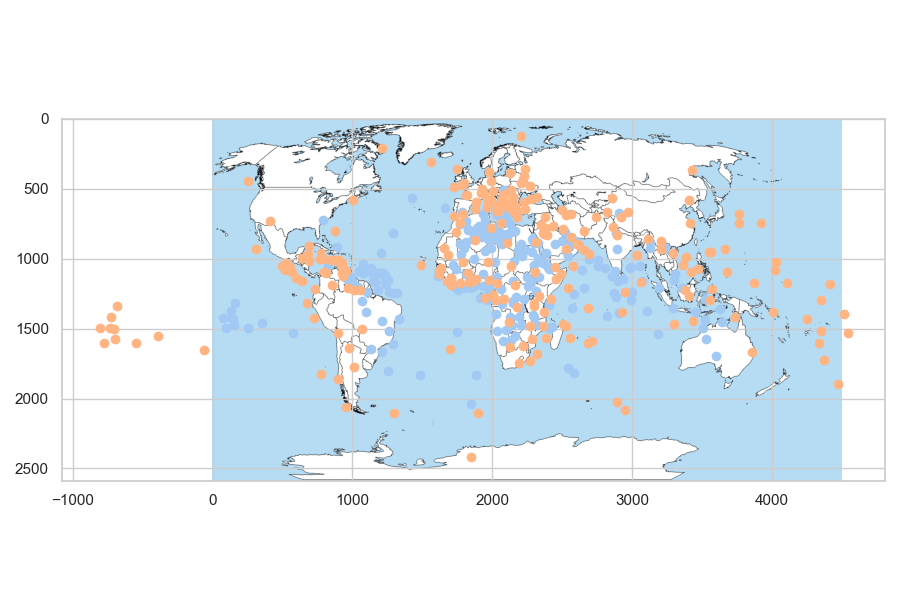

In [87]:
plt.figure(figsize=(9,6))
plt.imshow(im);



plt.tight_layout()